#### Improvement
Feature engineering: cross term and 2,3 power terms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

In [4]:
training_data = pd.read_csv('./train.csv').drop('id', axis=1)
test_data = pd.read_csv('./test.csv').drop('id',axis=1)
training_data['n_jobs'].loc[training_data['n_jobs']==-1] = 16
test_data['n_jobs'].loc[test_data['n_jobs']==-1] = 16
training_label = training_data['time']
data_corr = training_data.corr()['time']
data_corr

C:\Users\hanya\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


l1_ratio               -0.005580
alpha                   0.005835
max_iter                0.266155
random_state            0.037263
n_jobs                 -0.252937
n_samples               0.311411
n_features              0.227242
n_classes               0.168375
n_clusters_per_class   -0.066400
n_informative           0.117483
flip_y                  0.118694
scale                   0.002713
time                    1.000000
Name: time, dtype: float64

In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
#col_drop = pd.Series(index=['random_state'])
col_drop.index

Index(['l1_ratio', 'alpha', 'random_state', 'n_clusters_per_class', 'scale'], dtype='object')

In [6]:
training_data.columns

Index(['penalty', 'l1_ratio', 'alpha', 'max_iter', 'random_state', 'n_jobs',
       'n_samples', 'n_features', 'n_classes', 'n_clusters_per_class',
       'n_informative', 'flip_y', 'scale', 'time'],
      dtype='object')

In [7]:
all_data = pd.concat([training_data.drop('time',axis=1), test_data])#.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)
all_data

,penalty,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y
0,none,417,16,1089,327,4,7,0.074798
1,l1,578,1,790,373,4,7,0.077781
2,none,588,2,428,1198,2,6,0.030196
3,none,829,4,877,313,6,7,0.057261
4,elasticnet,167,2,216,644,8,11,0.073728
5,l1,986,4,1396,861,4,6,0.097483
6,none,929,2,908,691,5,6,0.095324
7,l1,422,8,677,737,9,8,0.040463
8,l1,308,8,498,1191,2,9,0.025639
9,l2,510,8,1380,803,9,10,0.024620


In [8]:
pd.concat([all_data.iloc[:400, :], training_label], axis=1).corr()

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,time
max_iter,1.000000,-0.068061,-0.028570,-0.037546,-0.025644,-0.017079,0.000659,0.264227
n_jobs,-0.068061,1.000000,0.020792,0.010504,0.090677,0.000046,-0.050287,-0.256118
n_samples,-0.028570,0.020792,1.000000,-0.023044,0.009666,0.038969,0.036897,0.296451
n_features,-0.037546,0.010504,-0.023044,1.000000,0.004685,-0.028838,0.031000,0.220124
n_classes,-0.025644,0.090677,0.009666,0.004685,1.000000,0.407778,0.023026,0.166696
n_informative,-0.017079,0.000046,0.038969,-0.028838,0.407778,1.000000,0.045170,0.109154
flip_y,0.000659,-0.050287,0.036897,0.031000,0.023026,0.045170,1.000000,0.120277
time,0.264227,-0.256118,0.296451,0.220124,0.166696,0.109154,0.120277,1.000000


In [9]:
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_jobs'] = all_data['max_iter']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']
all_data['n_samples_n_features'] = all_data['n_samples']*all_data['n_features']
all_data['n_samples_n_features_max_iter'] = all_data['n_samples']*all_data['n_features']*all_data['max_iter']

In [10]:
pd.concat([all_data.iloc[:440, :], training_label], axis=1).corr()

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,time
max_iter,1.000000,-0.038563,-0.022548,-0.029092,-0.043984,0.008979,0.005904,0.036294,0.478815,0.617951,-0.032570,0.463777,0.266155
n_jobs,-0.038563,1.000000,0.006045,0.003520,0.073822,-0.018441,-0.010088,-0.580888,-0.599795,-0.036583,0.026098,-0.001744,-0.252937
n_samples,-0.022548,0.006045,1.000000,0.016380,0.014555,0.034981,0.042098,0.466376,-0.002306,0.693910,0.690267,0.557076,0.311411
n_features,-0.029092,0.003520,0.016380,1.000000,0.023771,-0.024442,0.024168,0.014974,-0.020309,-0.006074,0.652289,0.499754,0.227242
n_classes,-0.043984,0.073822,0.014555,0.023771,1.000000,0.392076,0.020233,-0.071526,-0.077851,-0.005387,0.048365,-0.003483,0.168375
n_informative,0.008979,-0.018441,0.034981,-0.024442,0.392076,1.000000,0.025029,0.014007,-0.009275,0.012699,0.030608,-0.004845,0.117483
flip_y,0.005904,-0.010088,0.042098,0.024168,0.020233,0.025029,1.000000,0.028212,-0.026619,0.041529,0.055027,0.024493,0.118694
n_samples_n_jobs,0.036294,-0.580888,0.466376,0.014974,-0.071526,0.014007,0.028212,1.000000,0.645974,0.360309,0.314121,0.269747,0.508854
max_iter_n_jobs,0.478815,-0.599795,-0.002306,-0.020309,-0.077851,-0.009275,-0.026619,0.645974,1.000000,0.311627,-0.016337,0.223511,0.457363
max_iter_n_samples,0.617951,-0.036583,0.693910,-0.006074,-0.005387,0.012699,0.041529,0.360309,0.311627,1.000000,0.469331,0.779538,0.438039


In [11]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]
all_data1

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter
0,-0.484663,1.744962,0.679850,-1.127065,-0.760506,-1.061005,0.837412,-0.670257,-0.794420,0.105566,-0.518355,-0.557843
1,0.126446,-0.963775,-0.007062,-1.018985,-0.760506,-1.061005,0.936668,1.497199,1.656043,0.113627,-0.625257,-0.496856
2,0.164403,-0.783193,-0.838709,0.919407,-1.556384,-1.697608,-0.646688,-0.232112,0.395155,-0.545354,-0.245777,-0.130295
3,1.079170,-0.422028,0.192809,-1.159959,0.035372,-1.061005,0.253883,-0.216350,0.010007,0.983067,-0.660354,-0.336895
4,-1.433591,-0.783193,-1.325751,-0.382253,0.831251,1.485407,0.801800,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890
5,1.675096,-0.422028,1.385142,0.127603,-0.760506,-1.697608,1.592259,0.173195,0.184267,3.071112,0.953552,2.338989
6,1.458741,-0.783193,0.264027,-0.271823,-0.362567,-1.697608,1.520416,0.488434,1.152132,1.357638,-0.046210,0.656030
7,-0.465684,0.300302,-0.266665,-0.163743,1.229190,-0.424402,-0.305058,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415
8,-0.898395,0.300302,-0.677893,0.902960,-1.556384,0.212201,-0.798336,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314
9,-0.131662,0.300302,1.348384,-0.008672,1.229190,0.848804,-0.832220,-0.356707,-0.627097,0.908368,0.790298,0.606487


In [12]:
cols = all_data1.columns
for col1 in range(len(cols)):
    for col2 in range(col1, len(cols)):
        c1 = cols[col1]
        c2 = cols[col2]
        all_data1[str(c1)+'_'+str(c2)] = all_data1[c1] * all_data1[c2]

In [13]:
all_data1 -= all_data1.mean() 
df_pca = pd.DataFrame(np.mat(all_data1.values).T * np.mat(all_data1.values))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,539.000000,-32.404829,-50.372456,7.540315,-7.809120,34.828607,-5.677316,-1.058646,-6.085864,-33.945508,...,-42.979687,-63.623444,22.776538,-33.348582,-50.788080,22.223481,270.504181,-57.837676,19.858675,260.132904
1,-32.404829,539.000000,24.902437,18.864918,20.061945,-6.476041,-16.309005,-308.276580,-30.808569,-29.686634,...,469.359814,-14.130813,-25.599678,207.091884,13.697843,16.610210,-12.171369,262.883701,126.445988,62.806993
2,-50.372456,24.902437,539.000000,41.442524,5.461097,-8.158857,20.658918,242.960916,-29.686634,-45.413360,...,-14.130813,13.697843,16.610210,-12.171369,161.677754,-20.070889,208.490621,581.544380,551.146685,475.007172
3,7.540315,18.864918,41.442524,539.000000,12.508361,5.038151,3.293279,-3.870100,4.552269,-7.843323,...,11.910018,22.776538,-44.411649,-32.778911,22.223481,-57.837676,19.858675,517.845072,499.150451,455.236411
4,-7.809120,20.061945,5.461097,12.508361,539.000000,205.703277,17.625130,-28.010682,-6.018108,26.956358,...,37.755082,69.899432,18.260711,20.784150,12.208899,-34.733650,18.020315,86.417218,50.723139,71.417371
5,34.828607,-6.476041,-8.158857,5.038151,205.703277,539.000000,19.881153,-7.824369,7.643479,12.073233,...,-40.009545,69.858786,16.758392,15.075256,-97.210145,10.782023,17.810544,20.171780,60.074664,76.605242
6,-5.677316,-16.309005,20.658918,3.293279,17.625130,19.881153,539.000000,17.486795,17.955704,-8.738124,...,2.372811,-3.882439,-2.889656,-33.175997,26.130860,27.182666,-10.322053,38.662687,-26.862860,-28.291773
7,-1.058646,-308.276580,242.960916,-3.870100,-28.010682,-7.824369,17.486795,539.000000,17.665249,-6.825131,...,-119.136435,-182.452888,-9.230880,-163.958832,61.240398,39.564212,117.098450,100.939104,150.578577,145.273085
8,-6.085864,-30.808569,-29.686634,4.552269,-6.018108,7.643479,17.955704,17.665249,541.165641,6.620884,...,-96.575121,-150.663550,51.619080,-51.818147,-19.171312,45.873070,-8.476790,-80.794537,19.198807,-3.350532
9,-33.945508,-29.686634,-45.413360,-7.843323,26.956358,12.073233,-8.738124,-6.825131,6.620884,562.479419,...,-100.579672,-52.307495,41.831015,-16.662321,-243.166160,22.665886,29.761909,-407.624378,64.294617,396.774850


In [14]:
pd.concat([all_data1.iloc[:440, :], training_label], axis=1).corr()

,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,...,max_iter_n_jobs_max_iter_n_samples,max_iter_n_jobs_n_samples_n_features,max_iter_n_jobs_n_samples_n_features_max_iter,max_iter_n_samples_max_iter_n_samples,max_iter_n_samples_n_samples_n_features,max_iter_n_samples_n_samples_n_features_max_iter,n_samples_n_features_n_samples_n_features,n_samples_n_features_n_samples_n_features_max_iter,n_samples_n_features_max_iter_n_samples_n_features_max_iter,time
max_iter,1.000000,-0.038563,-0.022548,-0.029092,-0.043984,0.008979,0.005904,0.036294,-0.064706,-0.223506,...,-0.077707,0.025703,-0.052694,0.077892,-0.114442,0.497130,0.074955,-0.002142,0.211935,0.266155
n_jobs,-0.038563,1.000000,0.006045,0.003520,0.073822,-0.018441,-0.010088,-0.580888,0.019954,-0.037694,...,-0.219051,-0.038016,0.383458,-0.071787,0.071356,-0.032692,0.055063,0.020428,0.005466,-0.252937
n_samples,-0.022548,0.006045,1.000000,0.016380,0.014555,0.034981,0.042098,0.466376,-0.044463,0.077588,...,-0.134236,0.094214,-0.054163,-0.259701,0.034503,0.349018,-0.258479,0.422333,0.237180,0.311411
n_features,-0.029092,0.003520,0.016380,1.000000,0.023771,-0.024442,0.024168,0.014974,0.060423,0.009824,...,0.014954,0.043869,-0.063478,0.005524,0.106325,0.026574,-0.183580,0.444216,0.187343,0.227242
n_classes,-0.043984,0.073822,0.014555,0.023771,1.000000,0.392076,0.020233,-0.071526,-0.033702,0.045471,...,0.080700,0.007768,0.020072,0.002200,-0.105348,-0.056895,0.010788,-0.023218,-0.010928,0.168375
n_informative,0.008979,-0.018441,0.034981,-0.024442,0.392076,1.000000,0.025029,0.014007,-0.007108,-0.049974,...,0.074132,0.009228,-0.020561,-0.012409,-0.030737,-0.047926,-0.006109,-0.008939,-0.036012,0.117483
flip_y,0.005904,-0.010088,0.042098,0.024168,0.020233,0.025029,1.000000,0.028212,0.015926,0.024415,...,-0.070774,-0.021804,-0.065145,-0.056434,-0.055970,-0.045683,0.008963,0.000106,-0.021170,0.118694
n_samples_n_jobs,0.036294,-0.580888,0.466376,0.014974,-0.071526,0.014007,0.028212,1.000000,-0.029651,0.045740,...,-0.180759,0.051554,-0.325328,-0.058458,-0.035870,0.192037,-0.109239,0.136568,0.091488,0.508854
max_iter_n_jobs,-0.064706,0.019954,-0.044463,0.060423,-0.033702,-0.007108,0.015926,-0.029651,1.000000,-0.033871,...,-0.118614,0.105718,-0.200107,0.038329,0.031811,-0.103880,-0.032920,0.064023,-0.049285,-0.128129
max_iter_n_samples,-0.223506,-0.037694,0.077588,0.009824,0.045471,-0.049974,0.024415,0.045740,-0.033871,1.000000,...,0.015046,0.042124,-0.125883,0.059201,0.035479,-0.232259,-0.114378,0.141279,0.348081,0.102255


In [15]:
from scipy.linalg import svd
u,w,v = svd(df_pca)

In [30]:
all_data.index = range(len(all_data))
new_data = pd.DataFrame(np.mat(all_data1.values)*np.mat(u[:,:8]))
new_data

,0,1,2,3,4,5,6,7
0,1.093118,0.303618,0.227308,-1.418595,1.353214,1.777944,-2.005691,0.755301
1,1.406358,-0.988195,-0.456106,0.236757,-2.428438,-0.838605,-0.818335,-1.010159
2,1.536139,1.489621,0.252871,0.337515,-1.144486,-0.172765,-0.018832,0.514407
3,1.791860,1.108063,0.417429,0.429550,-1.404113,0.092730,-0.074650,-0.442830
4,1.301267,-0.484561,1.367966,-1.680091,0.331112,3.434538,2.765394,0.118052
5,-1.948175,1.292169,-6.703957,0.066637,2.439387,2.964426,3.499092,-4.164322
6,1.756123,0.831301,-1.125120,0.939077,-0.350292,0.772134,0.350363,-1.675620
7,2.112718,0.916040,0.190231,0.542029,-0.873411,0.598230,-0.778278,0.157557
8,1.671845,0.809424,0.594560,0.673151,-0.645018,0.216595,-0.644605,0.776518
9,1.249227,1.325338,0.139025,-0.156879,-1.464045,0.415524,-0.515421,-0.625243


In [31]:
# check the correlation of new features and old features & time
temp = all_data.copy()
temp.index = range(len(temp))
temp = pd.concat([temp.iloc[:440, :], training_label], axis=1)
chk = pd.concat([new_data.iloc[:440, :], temp], axis=1)

In [32]:
chk_corr = chk.corr()

In [33]:
w[:8].sum()/w.sum()

0.5661689385610752

In [34]:
all_data

,penalty,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter
0,none,-0.484663,1.744962,0.679850,-1.127065,-0.760506,-1.061005,0.837412,-0.670257,-0.794420,0.105566,-0.518355,-0.557843
1,l1,0.126446,-0.963775,-0.007062,-1.018985,-0.760506,-1.061005,0.936668,1.497199,1.656043,0.113627,-0.625257,-0.496856
2,none,0.164403,-0.783193,-0.838709,0.919407,-1.556384,-1.697608,-0.646688,-0.232112,0.395155,-0.545354,-0.245777,-0.130295
3,none,1.079170,-0.422028,0.192809,-1.159959,0.035372,-1.061005,0.253883,-0.216350,0.010007,0.983067,-0.660354,-0.336895
4,elasticnet,-1.433591,-0.783193,-1.325751,-0.382253,0.831251,1.485407,0.801800,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890
5,l1,1.675096,-0.422028,1.385142,0.127603,-0.760506,-1.697608,1.592259,0.173195,0.184267,3.071112,0.953552,2.338989
6,none,1.458741,-0.783193,0.264027,-0.271823,-0.362567,-1.697608,1.520416,0.488434,1.152132,1.357638,-0.046210,0.656030
7,l1,-0.465684,0.300302,-0.266665,-0.163743,1.229190,-0.424402,-0.305058,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415
8,l1,-0.898395,0.300302,-0.677893,0.902960,-1.556384,0.212201,-0.798336,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314
9,l2,-0.131662,0.300302,1.348384,-0.008672,1.229190,0.848804,-0.832220,-0.356707,-0.627097,0.908368,0.790298,0.606487


In [35]:
new_data1 = chk.drop(['penalty','time'], axis=1)
new_data1

,0,1,2,3,4,5,6,7,max_iter,n_jobs,n_samples,n_features,n_classes,n_informative,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter
0,1.093118,0.303618,0.227308,-1.418595,1.353214,1.777944,-2.005691,0.755301,-0.484663,1.744962,0.679850,-1.127065,-0.760506,-1.061005,0.837412,-0.670257,-0.794420,0.105566,-0.518355,-0.557843
1,1.406358,-0.988195,-0.456106,0.236757,-2.428438,-0.838605,-0.818335,-1.010159,0.126446,-0.963775,-0.007062,-1.018985,-0.760506,-1.061005,0.936668,1.497199,1.656043,0.113627,-0.625257,-0.496856
2,1.536139,1.489621,0.252871,0.337515,-1.144486,-0.172765,-0.018832,0.514407,0.164403,-0.783193,-0.838709,0.919407,-1.556384,-1.697608,-0.646688,-0.232112,0.395155,-0.545354,-0.245777,-0.130295
3,1.791860,1.108063,0.417429,0.429550,-1.404113,0.092730,-0.074650,-0.442830,1.079170,-0.422028,0.192809,-1.159959,0.035372,-1.061005,0.253883,-0.216350,0.010007,0.983067,-0.660354,-0.336895
4,1.301267,-0.484561,1.367966,-1.680091,0.331112,3.434538,2.765394,0.118052,-1.433591,-0.783193,-1.325751,-0.382253,0.831251,1.485407,0.801800,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890
5,-1.948175,1.292169,-6.703957,0.066637,2.439387,2.964426,3.499092,-4.164322,1.675096,-0.422028,1.385142,0.127603,-0.760506,-1.697608,1.592259,0.173195,0.184267,3.071112,0.953552,2.338989
6,1.756123,0.831301,-1.125120,0.939077,-0.350292,0.772134,0.350363,-1.675620,1.458741,-0.783193,0.264027,-0.271823,-0.362567,-1.697608,1.520416,0.488434,1.152132,1.357638,-0.046210,0.656030
7,2.112718,0.916040,0.190231,0.542029,-0.873411,0.598230,-0.778278,0.157557,-0.465684,0.300302,-0.266665,-0.163743,1.229190,-0.424402,-0.305058,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415
8,1.671845,0.809424,0.594560,0.673151,-0.645018,0.216595,-0.644605,0.776518,-0.898395,0.300302,-0.677893,0.902960,-1.556384,0.212201,-0.798336,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314
9,1.249227,1.325338,0.139025,-0.156879,-1.464045,0.415524,-0.515421,-0.625243,-0.131662,0.300302,1.348384,-0.008672,1.229190,0.848804,-0.832220,-0.356707,-0.627097,0.908368,0.790298,0.606487


In [36]:
col_get = ((chk_corr['time'])>0.2).drop('time')
col_get.index

Index([                              0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                            'max_iter',                        'n_jobs',
                           'n_samples',                    'n_features',
                           'n_classes',                 'n_informative',
                              'flip_y',              'n_samples_n_jobs',
                     'max_iter_n_jobs',            'max_iter_n_samples',
                'n_samples_n_features', 'n_samples_n_features_max_iter'],
      dtype='object')

In [37]:
all_data3 = pd.concat([new_data, all_data.drop('penalty', axis=1)], axis=1).loc[:, col_get.index]
all_data3 = pd.concat([all_data['penalty'], all_data3], axis=1)
all_data3 = pd.get_dummies(all_data3)
all_data3

,0,1,2,3,4,5,6,7,max_iter,n_jobs,...,flip_y,n_samples_n_jobs,max_iter_n_jobs,max_iter_n_samples,n_samples_n_features,n_samples_n_features_max_iter,penalty_elasticnet,penalty_l1,penalty_l2,penalty_none
0,1.093118,0.303618,0.227308,-1.418595,1.353214,1.777944,-2.005691,0.755301,-0.484663,1.744962,...,0.837412,-0.670257,-0.794420,0.105566,-0.518355,-0.557843,0,0,0,1
1,1.406358,-0.988195,-0.456106,0.236757,-2.428438,-0.838605,-0.818335,-1.010159,0.126446,-0.963775,...,0.936668,1.497199,1.656043,0.113627,-0.625257,-0.496856,0,1,0,0
2,1.536139,1.489621,0.252871,0.337515,-1.144486,-0.172765,-0.018832,0.514407,0.164403,-0.783193,...,-0.646688,-0.232112,0.395155,-0.545354,-0.245777,-0.130295,0,0,0,1
3,1.791860,1.108063,0.417429,0.429550,-1.404113,0.092730,-0.074650,-0.442830,1.079170,-0.422028,...,0.253883,-0.216350,0.010007,0.983067,-0.660354,-0.336895,0,0,0,1
4,1.301267,-0.484561,1.367966,-1.680091,0.331112,3.434538,2.765394,0.118052,-1.433591,-0.783193,...,0.801800,-0.550353,-0.539412,-1.238532,-0.895965,-0.907890,1,0,0,0
5,-1.948175,1.292169,-6.703957,0.066637,2.439387,2.964426,3.499092,-4.164322,1.675096,-0.422028,...,1.592259,0.173195,0.184267,3.071112,0.953552,2.338989,0,1,0,0
6,1.756123,0.831301,-1.125120,0.939077,-0.350292,0.772134,0.350363,-1.675620,1.458741,-0.783193,...,1.520416,0.488434,1.152132,1.357638,-0.046210,0.656030,0,0,0,1
7,2.112718,0.916040,0.190231,0.542029,-0.873411,0.598230,-0.778278,0.157557,-0.465684,0.300302,...,-0.305058,-0.620532,-0.675934,-0.435940,-0.269782,-0.384415,0,1,0,0
8,1.671845,0.809424,0.594560,0.673151,-0.645018,0.216595,-0.644605,0.776518,-0.898395,0.300302,...,-0.798336,-0.687707,-0.739200,-0.861347,-0.105915,-0.462314,0,1,0,0
9,1.249227,1.325338,0.139025,-0.156879,-1.464045,0.415524,-0.515421,-0.625243,-0.131662,0.300302,...,-0.832220,-0.356707,-0.627097,0.908368,0.790298,0.606487,0,0,1,0


In [41]:
#new_data = all_data3
new_data = pd.get_dummies(all_data)
training_len = 350 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

#### Ridge

In [42]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [43]:
from sklearn.linear_model import Ridge

In [48]:
params = np.linspace(0.1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.95it/s]


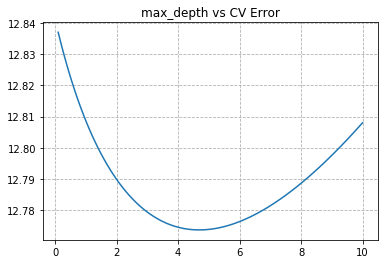

In [49]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [50]:
clf1_test = Ridge(alpha=4.5)
clf1_test.fit(X_train, y_train) 

Ridge(alpha=4.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
y_train_test_pre = clf1_test.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 5.13


In [52]:
y_train_test_pre = clf1_test.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 10.11


In [45]:
rst = clf1_test.predict(x_test)
rst

array([ 2.83925588e+00,  5.55165600e+00,  1.87817212e-01,  1.36356911e+00,
        9.27414298e+00,  6.58755531e+00,  5.97356405e+00,  2.42372579e-01,
        9.68647468e+00, -1.28433726e+00,  1.67275037e+01,  1.22410010e+01,
        2.07616261e-01,  1.47615900e+01,  2.80888612e+00,  1.19571474e+00,
        2.68968341e+00,  2.36118090e+01,  3.03752406e+00,  1.00464907e+00,
       -9.42944225e-01, -2.36067451e+00, -1.12913368e+00,  2.42489675e+00,
        2.03041310e+00,  5.21685422e+00, -1.21138910e+00,  1.25807173e+00,
        3.32815168e+00,  7.16975351e+00,  7.20094918e+00,  1.70450855e+00,
       -6.36314357e-01,  5.10928376e+00,  4.99385785e+00,  1.01132604e+00,
        2.31330184e+00,  2.58563480e+00,  5.11567706e-01,  4.88664860e+00,
        3.76798172e+00,  7.27925553e+00,  2.83878629e+00,  1.78699358e+01,
        1.44608961e-01,  1.94596090e+00,  1.36348686e+00,  1.50539748e+00,
        1.42477776e+01,  6.36368626e-01, -3.07393333e+00,  1.37584936e+01,
       -4.42377386e-01,  

In [46]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [36]:
rt

,0,1
0,0,1.629458
1,1,5.698748
2,2,0.159063
3,3,-0.027082
4,4,6.668147
5,5,6.434075
6,6,5.733778
7,7,-0.149816
8,8,10.165780
9,9,-0.518167


In [37]:
rt.columns = ['id', 'time']
rt[rt<0]=0.45

In [38]:
rt.to_csv("./submissionv3_polyfeature_median_newdata.csv")

#### Lasso

In [89]:
from sklearn.linear_model import Lasso

In [95]:
params = np.linspace(0.1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf2 = Lasso(alpha=param)
    test_score = cross_val_score(clf2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 33.47it/s]


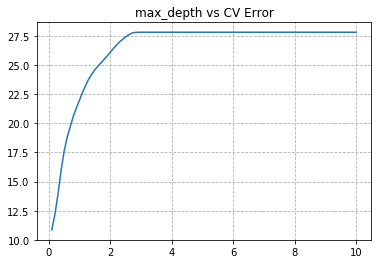

In [96]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [90]:
clf2_test = Lasso(alpha=0.1)
clf2_test.fit(X_train, y_train) 

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
y_train_test_pre = clf2_test.predict(X_train)
y_train_test_pre[y_train_test_pre<0]=training_label.median()
print("Mean squared test error: %.2f" % mean_squared_error(y_train, y_train_test_pre))

Mean squared test error: 7.59


In [92]:
clf2_test.coef_

array([-0.17992596,  0.        , -0.38610767,  0.39974417,  0.3458888 ,
        0.26546369, -0.21379476,  0.06940959,  0.        , -0.41345042,
       -0.02688569,  0.09045889, -0.44911813, -0.19209171, -0.        ,
        0.25998035,  0.        , -0.02735211, -0.        ,  0.09888085,
       -0.        , -0.02850153, -0.        , -0.16409603, -0.0394949 ,
       -0.25371932, -0.00474912, -0.        ,  0.        , -0.21193588,
       -0.29438938,  0.12177185,  0.        , -0.        , -0.        ,
       -0.03360978,  0.14136751, -0.        , -0.        ,  0.03790673,
        0.3119236 ,  0.0242168 , -0.        , -0.        , -0.02856588,
       -0.12878757, -0.21873046,  0.        ,  0.0120602 , -0.2604435 ,
        0.27966079,  0.        ,  0.        , -0.06524766,  0.        ,
       -0.        , -0.        , -0.10923211, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.  

In [108]:
rst = clf2_test.predict(x_test)

In [109]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [110]:
rt.columns = ['id', 'time']
rt[rt<0]=training_label.median()

In [111]:
rt

,id,time
0,0,2.287085
1,1,6.438333
2,2,1.405072
3,3,1.405072
4,4,4.374994
5,5,6.446228
6,6,4.800760
7,7,0.257652
8,8,8.721196
9,9,0.935246


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
#params = range(10,250,10)
params = range(5,15)
test_scores = []
for param in tqdm(params):
    reg_rf = RandomForestRegressor(n_estimators=200, max_depth=param)
    test_score = cross_val_score(reg_rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(-np.mean(test_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [04:05<00:00, 24.85s/it]


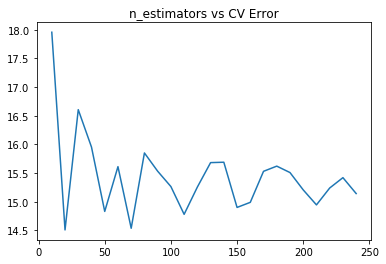

In [49]:
plt.plot(params, test_scores)
plt.title("n_estimators vs CV Error");

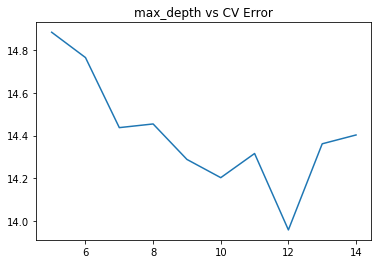

In [59]:
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [64]:
reg_rf = RandomForestRegressor(n_estimators=200, max_depth=12)
reg_rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
y_train_test_pre = reg_rf.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 7.97


### SVR

In [66]:
from sklearn.svm import SVR

In [74]:
params = range(20,100)
test_scores = []
for param in tqdm(params):
    reg_svm = SVR(gamma='scale', C=param, epsilon=0.2)
    test_score = cross_val_score(reg_svm, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(-np.mean(test_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:28<00:00,  2.99it/s]


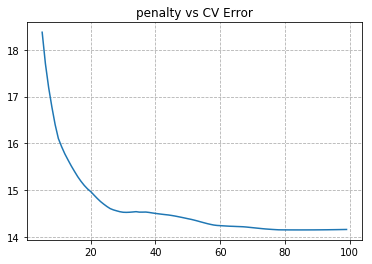

In [75]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("penalty vs CV Error");

In [76]:
reg_svr = reg_svm = SVR(gamma='scale', C=80, epsilon=0.2)
reg_svr.fit(X_train, y_train) 

SVR(C=80, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [82]:
y_train_test_pre1 = reg_svr.predict(X_train_test) 
y_train_test_pre2 = clf1_test.predict(X_train_test)
y_train_test_pre1[y_train_test_pre1<0]=0.45
y_train_test_pre2[y_train_test_pre2<0]=0.45
y_train_test_pre = (y_train_test_pre1 + y_train_test_pre2)/2
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 2.84


In [88]:
y_train_test_pre = reg_svr.predict(X_train_test)
y_train_test_pre[y_train_test_pre<0]=0.45
print("Mean squared test error: %.2f" % mean_squared_error(y_train_test, y_train_test_pre))

Mean squared test error: 2.90


In [100]:
y_train_test_pre1 = reg_svr.predict(x_test) 
y_train_test_pre2 = clf1_test.predict(x_test)
y_train_test_pre1[y_train_test_pre1<0]=0.45
y_train_test_pre2[y_train_test_pre2<0]=0.45
rst = (y_train_test_pre1 + y_train_test_pre2)/2

In [101]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [102]:
rt.to_csv('./submission_v3_ensembling.csv')